In [38]:
!pip install torch
!pip install torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [36]:
trans = transforms.Compose([transforms.Resize((28, 28)),
                            transforms.Grayscale(),
                            transforms.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root = "./data", transform=trans)

In [37]:
trainset

Dataset ImageFolder
    Number of datapoints: 180
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

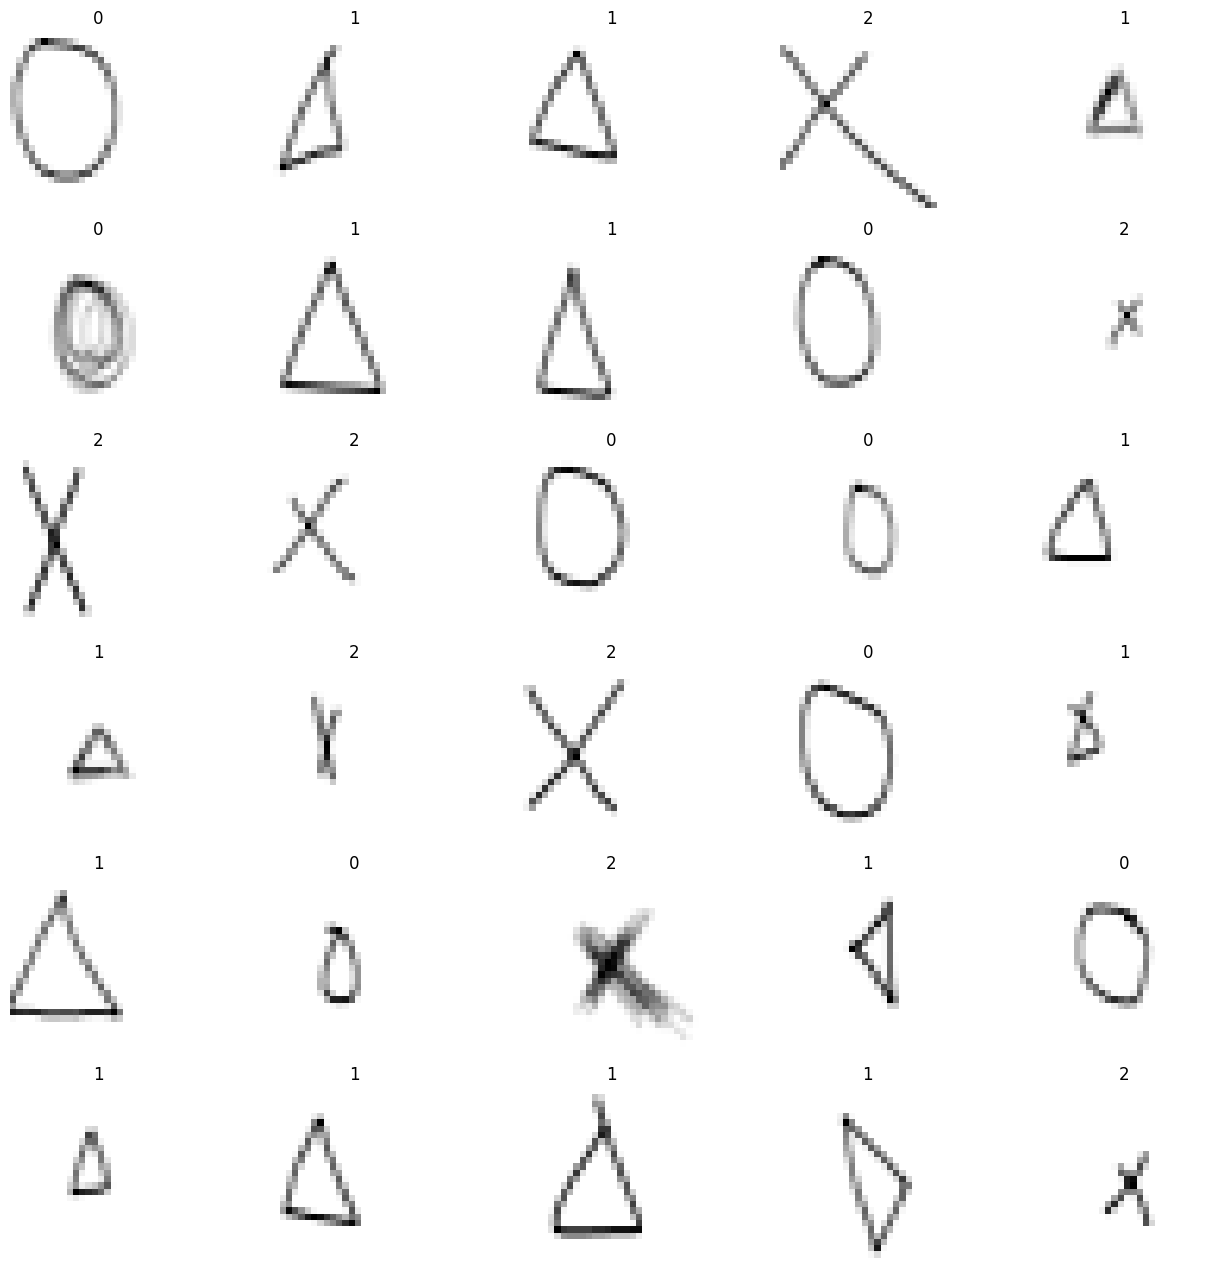

In [40]:
loader = DataLoader(
    dataset = trainset,
    batch_size = 30, # 몇개씩 가져올것인가
    shuffle = True
)

imgs, labels = next(iter(loader))
fig, axes = plt.subplots(6, 5, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.reshape((28, 28)), cmap="gray")
  ax.set_title(label.item()) # 파일을 인덱스로 
  ax.axis("off")

In [42]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding="same"),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32, 64, kernel_size=3, padding="same"),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(64*7*7, 10)
)

print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [44]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000

for epoch in range(epochs+2):
  sum_losses = 0
  sum_accs = 0

  for x_batch, y_batch in loader:
    x_batch = x_batch
    y_batch = y_batch
    y_pred = model(x_batch)
    loss = nn.CrossEntropyLoss()(y_pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    sum_losses = sum_losses + loss
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
    sum_accs = sum_accs + acc
  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)
  print(f"Epoch: {epoch:4d}/{epochs} Loss: {loss:.6f} Accuracy: {avg_acc:.2f}%")

Epoch:    0/1000 Loss: 1.217914 Accuracy: 31.67%
Epoch:    1/1000 Loss: 1.091641 Accuracy: 38.89%
Epoch:    2/1000 Loss: 1.071547 Accuracy: 39.44%
Epoch:    3/1000 Loss: 1.079929 Accuracy: 41.11%
Epoch:    4/1000 Loss: 1.101178 Accuracy: 45.00%
Epoch:    5/1000 Loss: 1.066784 Accuracy: 44.44%
Epoch:    6/1000 Loss: 0.991551 Accuracy: 48.33%
Epoch:    7/1000 Loss: 1.017348 Accuracy: 55.00%
Epoch:    8/1000 Loss: 0.981608 Accuracy: 55.00%
Epoch:    9/1000 Loss: 1.044006 Accuracy: 52.22%
Epoch:   10/1000 Loss: 1.006473 Accuracy: 56.67%
Epoch:   11/1000 Loss: 1.010320 Accuracy: 58.33%
Epoch:   12/1000 Loss: 0.920642 Accuracy: 57.22%
Epoch:   13/1000 Loss: 0.905631 Accuracy: 64.44%
Epoch:   14/1000 Loss: 0.910548 Accuracy: 69.44%
Epoch:   15/1000 Loss: 0.822946 Accuracy: 67.78%
Epoch:   16/1000 Loss: 0.805072 Accuracy: 73.33%
Epoch:   17/1000 Loss: 0.813843 Accuracy: 69.44%
Epoch:   18/1000 Loss: 0.813674 Accuracy: 71.67%
Epoch:   19/1000 Loss: 0.766554 Accuracy: 78.89%
Epoch:   20/1000 Los